<a href="https://colab.research.google.com/github/Aryan647/Aryan647/blob/main/Copy_of_StudentPerformancePridictionUsingRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using essential libraries
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [ ]:
#Using dataset from dropbox where i uploaded my real dataset
!wget -O student_prediction.csv 'https://www.dropbox.com/scl/fi/312v4xoru4b4v79loxh8i/student..prediction.csv?rlkey=lgtsoltlqhl2kjjfmyrwsnatu&st=z17xphpr&dl=0'

df = pd.read_csv('student_prediction.csv')
print(df.head())

--2025-03-18 18:53:17--  https://www.dropbox.com/scl/fi/312v4xoru4b4v79loxh8i/student..prediction.csv?rlkey=lgtsoltlqhl2kjjfmyrwsnatu&st=z17xphpr&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb61012c9d520e9ba3ee1226881.dl.dropboxusercontent.com/cd/0/inline/CmHrMGB6RUvO_J-TRUKysZZwNO8DsRzE5Yger1d_QRd8qjRg2DuD8SRGpaJl0ingA7y4qX_-eNBB-4xfCxRJgS1rlZknkXjfwhx37neni3NcKWEXntAdJ2kZ6rUD4GjTkZSdhm90JyPy7wSEGjI7CFac/file# [following]
--2025-03-18 18:53:17--  https://ucb61012c9d520e9ba3ee1226881.dl.dropboxusercontent.com/cd/0/inline/CmHrMGB6RUvO_J-TRUKysZZwNO8DsRzE5Yger1d_QRd8qjRg2DuD8SRGpaJl0ingA7y4qX_-eNBB-4xfCxRJgS1rlZknkXjfwhx37neni3NcKWEXntAdJ2kZ6rUD4GjTkZSdhm90JyPy7wSEGjI7CFac/file
Resolving ucb61012c9d520e9ba3ee1226881.dl.dropboxusercontent.com (ucb61012c9d520e9ba3ee1226881.dl.dropboxusercontent.

In [ ]:
#Using dataset from google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#file_path = '/content/drive/MyDrive/data/student..prediction.csv'
#df = pd.read_csv(file_path)

In [ ]:
#'Student_ID' is not useful so we remove it from the dataset
df.drop(['Student_ID'], axis=1, inplace=True)

In [ ]:
df

Student_Age     Sex High_School_Type Scholarship A6itional_Work  \
0             20    Male            Other         50%            Yes   
1             20    Male            Other         50%            Yes   
2             20    Male            State         50%             No   
3             18  Female          Private         50%            Yes   
4             20    Male          Private         50%             No   
..           ...     ...              ...         ...            ...   
640           18  Female            Other         50%            Yes   
641           19    Male            State         25%            Yes   
642           21  Female          Private         50%            Yes   
643           18    Male            Other        100%            Yes   
644           20  Female            State         75%            Yes   

    Sports_activity Transportation  Weekly_Study_Hours Attendance Reading  \
0                No        Private                   0     Always     Yes   
1                No        Private                   0     Always     Yes   
2                No        Private                   2      Never      No   
3                No            Bus                   2     Always      No   
4                No            Bus                  12     Always     Yes   
..              ...            ...                 ...        ...     ...   
640              No            Bus                  22     Always     Yes   
641             Yes        Private                  24     Always     Yes   
642             Yes            Bus                  26     Always     Yes   
643             Yes        Private                  30     Always     Yes   
644             Yes            Bus                  30     Always     Yes   

    Notes Listening_in_Class Project_work  Grade  
0     Yes                 No           No   9.00  
1      No                Yes          Yes   9.00  
2      No                 No          Yes   9.00  
3     Yes                 No           No   9.00  
4      No                Yes          Yes   9.00  
..    ...                ...          ...    ...  
640   Yes                Yes          Yes   9.50  
641   Yes                Yes          Yes   9.60  
642   Yes                Yes          Yes   9.65  
643   Yes                Yes          Yes   9.85  
644   Yes                Yes          Yes   9.85  

[645 rows x 14 columns]

In [ ]:
#Here we doing one hot coding for categorical data by making dummies of all different categorical columns
df= pd.get_dummies(df, columns=['Sex','High_School_Type','A6itional_Work','Transportation','Attendance','Sports_activity','Reading','Notes',
                                'Listening_in_Class','Project_work'], drop_first=True)

In [ ]:
df

Student_Age Scholarship  Weekly_Study_Hours  Grade  Sex_Male  \
0             20         50%                   0   9.00      True   
1             20         50%                   0   9.00      True   
2             20         50%                   2   9.00      True   
3             18         50%                   2   9.00     False   
4             20         50%                  12   9.00      True   
..           ...         ...                 ...    ...       ...   
640           18         50%                  22   9.50     False   
641           19         25%                  24   9.60      True   
642           21         50%                  26   9.65     False   
643           18        100%                  30   9.85      True   
644           20         75%                  30   9.85     False   

     High_School_Type_Private  High_School_Type_State  A6itional_Work_Yes  \
0                       False                   False                True   
1                       False                   False                True   
2                       False                    True               False   
3                        True                   False                True   
4                        True                   False               False   
..                        ...                     ...                 ...   
640                     False                   False                True   
641                     False                    True                True   
642                      True                   False                True   
643                     False                   False                True   
644                     False                    True                True   

     Transportation_Private  Attendance_Always  Attendance_Never  \
0                      True               True             False   
1                      True               True             False   
2                      True              False              True   
3                     False               True             False   
4                     False               True             False   
..                      ...                ...               ...   
640                   False               True             False   
641                    True               True             False   
642                   False               True             False   
643                    True               True             False   
644                   False               True             False   

     Attendance_Sometimes  Sports_activity_Yes  Reading_Yes  Notes_No  \
0                   False                False         True     False   
1                   False                False         True      True   
2                   False                False        False      True   
3                   False                False        False     False   
4                   False                False         True      True   
..                    ...                  ...          ...       ...   
640                 False                False         True     False   
641                 False                 True         True     False   
642                 False                 True         True     False   
643                 False                 True         True     False   
644                 False                 True         True     False   

     Notes_Yes  Listening_in_Class_No  Listening_in_Class_Yes  \
0         True                   True                   False   
1        False                  False                    True   
2        False                   True                   False   
3         True                   True                   False   
4        False                  False                    True   
..         ...                    ...                     ...   
640       True                  False                    True   
641       True                  False

In [ ]:
#'Scholarship' attribute is in the percentage so we have to convert in integer.
df['Scholarship'] = df['Scholarship'].replace({'1%':1,'25%':25,'50%': 50, '75%': 75, '100%': 100}).astype(int)
df

<ipython-input-88-50522ea805aa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Scholarship'] = df['Scholarship'].replace({'1%':1,'25%':25,'50%': 50, '75%': 75, '100%': 100}).astype(int)


Student_Age  Scholarship  Weekly_Study_Hours  Grade  Sex_Male  \
0             20           50                   0   9.00      True   
1             20           50                   0   9.00      True   
2             20           50                   2   9.00      True   
3             18           50                   2   9.00     False   
4             20           50                  12   9.00      True   
..           ...          ...                 ...    ...       ...   
640           18           50                  22   9.50     False   
641           19           25                  24   9.60      True   
642           21           50                  26   9.65     False   
643           18          100                  30   9.85      True   
644           20           75                  30   9.85     False   

     High_School_Type_Private  High_School_Type_State  A6itional_Work_Yes  \
0                       False                   False                True   
1                       False                   False                True   
2                       False                    True               False   
3                        True                   False                True   
4                        True                   False               False   
..                        ...                     ...                 ...   
640                     False                   False                True   
641                     False                    True                True   
642                      True                   False                True   
643                     False                   False                True   
644                     False                    True                True   

     Transportation_Private  Attendance_Always  Attendance_Never  \
0                      True               True             False   
1                      True               True             False   
2                      True              False              True   
3                     False               True             False   
4                     False               True             False   
..                      ...                ...               ...   
640                   False               True             False   
641                    True               True             False   
642                   False               True             False   
643                    True               True             False   
644                   False               True             False   

     Attendance_Sometimes  Sports_activity_Yes  Reading_Yes  Notes_No  \
0                   False                False         True     False   
1                   False                False         True      True   
2                   False                False        False      True   
3                   False                False        False     False   
4                   False                False         True      True   
..                    ...                  ...          ...       ...   
640                 False                False         True     False   
641                 False                 True         True     False   
642                 False                 True         True     False   
643                 False                 True         True     False   
644                 False                 True         True     False   

     Notes_Yes  Listening_in_Class_No  Listening_in_Class_Yes  \
0         True                   True                   False   
1        False                  False                    True   
2        False                   True                   False   
3         True                   True                   False   
4        False                  False                    True   
..         ...                    ...                     ...   
640       True                  False                    True   
641       True           

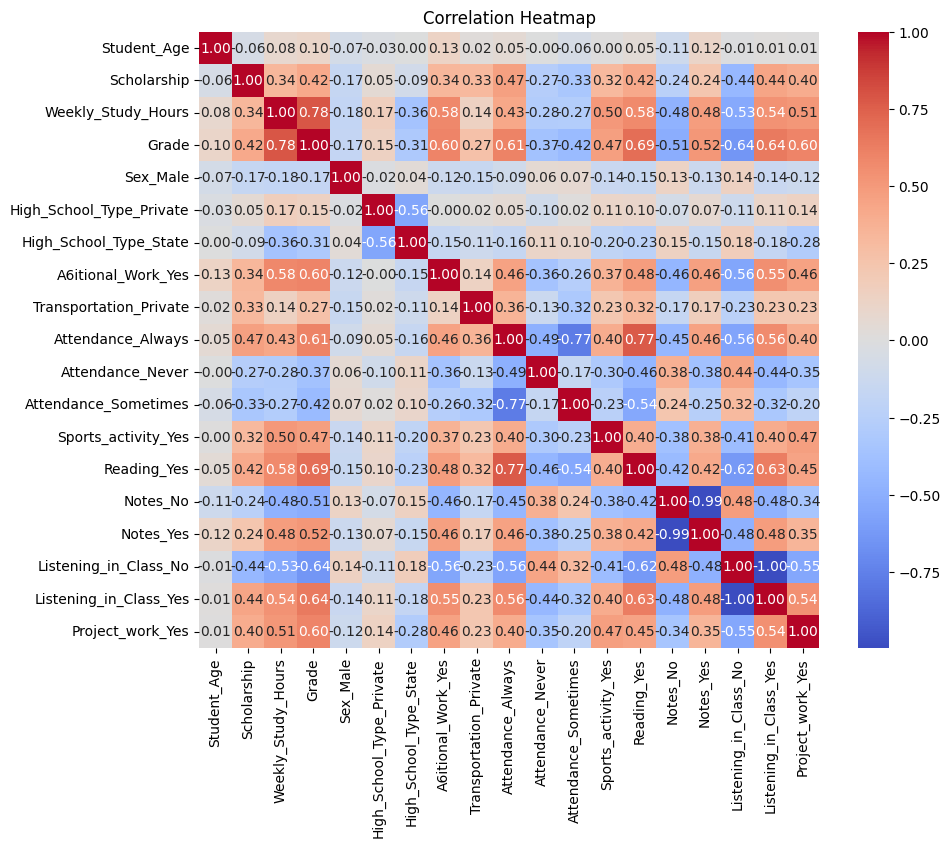

In [ ]:

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

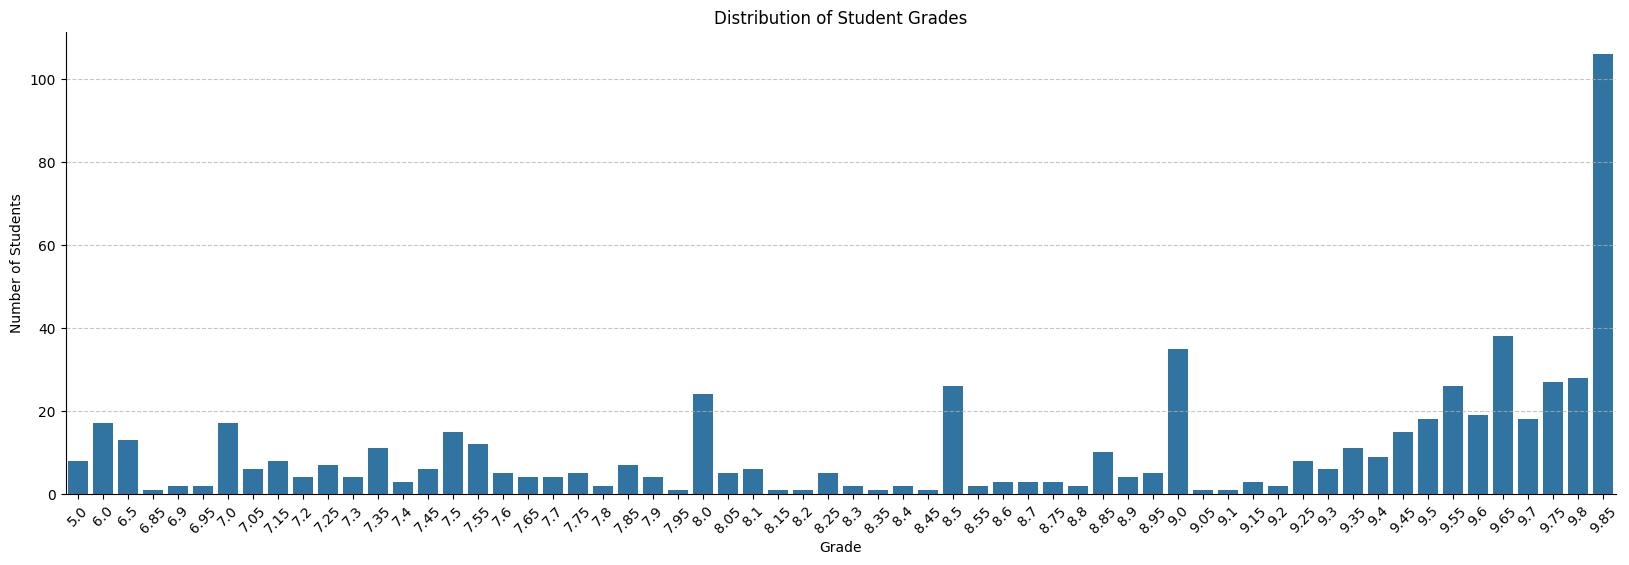

In [ ]:
#Graph of students grade
grade_counts = df['Grade'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
sns.barplot(x=grade_counts.index, y=grade_counts.values)
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Distribution of Student Grades")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

In [ ]:
#'target_variable' is the column that I want to predict
target_variable='Grade';
X=df.drop(target_variable, axis=1)
y=df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Predict on the test
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate accuracy based on R-squared and MSE
print('R-Squared (R\u00b2): {:.2f}%'.format(r2 ))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))

R-Squared (R²): 0.80%
Mean Squared Error (MSE): 0.29
Mean Absolute Error (MAE): 0.31


If we want to increase the accuracy, we can use hyperparameter tuning. In my case, the accuracy is slightly lower because my dataset is relatively small, with the original dataset consisting of 145 rows. To improve the performance, I extended the dataset by creating a new, larger version.